<a href="https://colab.research.google.com/github/alexandragrecu/Bark-and-Purr/blob/master/Cleaning_data_accidental_drug_related_death.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Accidental drug related deaths**
<p>Nearly 841,000 people have died since 1999 from a drug overdose. In 2019, 70,630 drug overdose deaths occurred in the United States. The age-adjusted rate of overdose deaths increased by over 4% from 2018 (20.7 per 100,000) to 2019 (21.6 per 100,000).</p>
<p>Poisoning with drugs can be classified as:

- self-harm or suicide when the person wants to harm himself;

- assault or homicide when the person wants to harm another; 

- **unintentional, also known as "accidental," when no harm is intended. Unintentional drug poisoning includes drug overdoses resulting from drug misuse, drug abuse, and taking too much of a drug for medical reasons**.</p>

<p><img src="https://as2.ftcdn.net/v2/jpg/04/10/78/23/1000_F_410782386_wRjZM340f2erGZjuMKZzcsuKDUUiQ2ZD.jpg" alt="No drugs"></p>


## 💾 The dataset
Let's take a look at the data, which consists of a file:

- <code>accidents.csv</code>: contains all the accidental drug related deaths from 2012 to 2018.
This dataset contains 5106 of deaths reported and it is avalable [here](https://drive.google.com/file/d/1eilILR4hKgka9SA2zGV2VofQLAQVSZqe/view?usp=sharing).


## 📌 Our tasks are:
<ul>
<li> Clean this dataset;
<li> Explore this dataset and provide useful information that can help you understand better these deaths.
</ul>



---



---



## 1. 📚 Load packages

In [ ]:
!pip install fuzzywuzzy

In [ ]:
!pip install python-Levenshtein

In [ ]:
import pandas as pd
import datetime as dt
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import fuzz
import re
from google.colab import files

## 2. 📖 Reading the dataset:

In [ ]:
uploaded = files.upload()

In [ ]:
accidents = pd.read_csv('accidents.csv')

## 3. 🕵️ Understanding our dataset:

In [ ]:
accidents.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,06/28/2014 12:00:00 AM,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [ ]:
accidents.shape

(5105, 41)

In [ ]:
accidents.dtypes

ID                      object
Date                    object
DateType                object
Age                    float64
Sex                     object
Race                    object
ResidenceCity           object
ResidenceCounty         object
ResidenceState          object
DeathCity               object
DeathCounty             object
Location                object
LocationifOther         object
DescriptionofInjury     object
InjuryPlace             object
InjuryCity              object
InjuryCounty            object
InjuryState             object
COD                     object
OtherSignifican         object
Heroin                  object
Cocaine                 object
Fentanyl                object
FentanylAnalogue        object
Oxycodone               object
Oxymorphone             object
Ethanol                 object
Hydrocodone             object
Benzodiazepine          object
Methadone               object
Amphet                  object
Tramad                  object
Morphine

In [ ]:
accidents.isna().sum()

ID                        0
Date                      2
DateType                  2
Age                       3
Sex                       6
Race                     13
ResidenceCity           173
ResidenceCounty         797
ResidenceState         1549
DeathCity                 5
DeathCounty            1100
Location                 24
LocationifOther        4515
DescriptionofInjury     780
InjuryPlace              66
InjuryCity             1756
InjuryCounty           2741
InjuryState            3681
COD                       0
OtherSignifican        4936
Heroin                 2576
Cocaine                3584
Fentanyl               2873
FentanylAnalogue       4716
Oxycodone              4498
Oxymorphone            4997
Ethanol                3858
Hydrocodone            4987
Benzodiazepine         3762
Methadone              4631
Amphet                 4946
Tramad                 4975
Morphine_NotHeroin     5063
Hydromorphone          5080
Other                  4670
OpiateNOS           

### 📊 We have 5105 accidents with 41 values. There are values that don't have the right data type and we have a lot of NA values. 



First thing first, let's lowecase the first letter of column headers:

In [ ]:
# transform dataframe column headers - lowercase the first letter
accidents.columns = [col[0].lower() + col[1:] for col in accidents.columns]
names = accidents.columns.tolist()
names[names.index('locationifOther')] = 'locationIfOther'
names[names.index('mannerofDeath')] = 'mannerOfDeath'
names[names.index('descriptionofInjury')] = 'descriptionOfInjury'
names[names.index('cOD')] = 'COD'
names[names.index('iD')] = 'id'
names[names.index('otherSignifican')] = 'otherSignificantCOD'
names[names.index('other')] = 'otherSubstance'

accidents.columns = names

In [ ]:
accidents.columns

Index(['id', 'date', 'dateType', 'age', 'sex', 'race', 'residenceCity',
       'residenceCounty', 'residenceState', 'deathCity', 'deathCounty',
       'location', 'locationIfOther', 'descriptionOfInjury', 'injuryPlace',
       'injuryCity', 'injuryCounty', 'injuryState', 'COD',
       'otherSignificantCOD', 'heroin', 'cocaine', 'fentanyl',
       'fentanylAnalogue', 'oxycodone', 'oxymorphone', 'ethanol',
       'hydrocodone', 'benzodiazepine', 'methadone', 'amphet', 'tramad',
       'morphine_NotHeroin', 'hydromorphone', 'otherSubstance', 'opiateNOS',
       'anyOpioid', 'mannerOfDeath', 'deathCityGeo', 'residenceCityGeo',
       'injuryCityGeo'],
      dtype='object')

## 4. 🪥 Cleaning Data Process: 


*   Missing Values
*   Element din listă





### 4.1 🔍 Missing values:

Let's see once again what columns have missing values: 

In [ ]:
accidents.isna().sum()

id                        0
date                      2
dateType                  2
age                       3
sex                       6
race                     13
residenceCity           173
residenceCounty         797
residenceState         1549
deathCity                 5
deathCounty            1100
location                 24
locationIfOther        4515
descriptionOfInjury     780
injuryPlace              66
injuryCity             1756
injuryCounty           2741
injuryState            3681
COD                       0
otherSignificantCOD    4936
heroin                 2576
cocaine                3584
fentanyl               2873
fentanylAnalogue       4716
oxycodone              4498
oxymorphone            4997
ethanol                3858
hydrocodone            4987
benzodiazepine         3762
methadone              4631
amphet                 4946
tramad                 4975
morphine_NotHeroin     5063
hydromorphone          5080
otherSubstance         4670
opiateNOS           

For ease, let's see a visual diagram of these missing values:

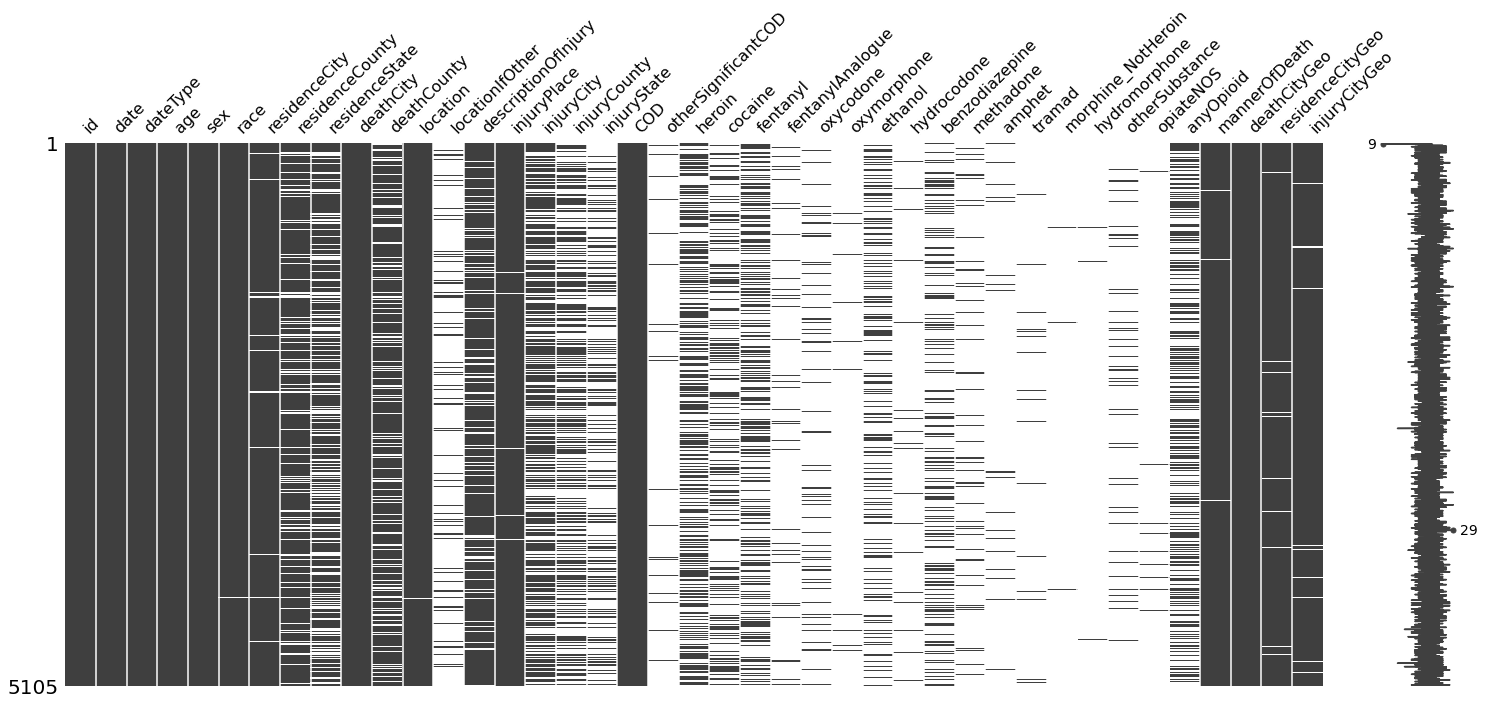

In [ ]:
msno.matrix(accidents)
plt.show()

Wow, we have a lot of missing values, looks like it's a beautiful dataset. 😂😂 Just joking, I'm not such a nerd, it's scarry. 😂😂 ☠️

- We can see that date, dateType, age, sex and race columns hava a small number of missing values, we can drop them:

In [ ]:
cols = ['date', 'dateType', 'age', 'sex', 'race']
accidents.dropna(subset=cols, inplace=True)

In [ ]:
accidents.isna().sum()[cols]

date        0
dateType    0
age         0
sex         0
race        0
dtype: int64

- On the other hand, we see that the substances columns (from heroin to opiateNOS) have the most missing values, because if a person died of a specific substance, the column for that specific substance has value 'Y', and the other substance columns have NA values. We can correct this by introducing True/False values:

In [ ]:
substances = ['heroin', 'cocaine', 'fentanyl', 'fentanylAnalogue', 'oxycodone', 'oxymorphone', 'ethanol', 'hydrocodone', 'benzodiazepine',
              'methadone', 'amphet', 'tramad', 'morphine_NotHeroin', 'hydromorphone', 'opiateNOS', 'anyOpioid']

for substance in substances:
    accidents[substance] = np.where(accidents[substance] == 'Y', True, False)

In [ ]:
accidents.isna().sum()

id                        0
date                      0
dateType                  0
age                       0
sex                       0
race                      0
residenceCity           167
residenceCounty         789
residenceState         1541
deathCity                 1
deathCounty            1091
location                 20
locationIfOther        4500
descriptionOfInjury     777
injuryPlace              65
injuryCity             1752
injuryCounty           2733
injuryState            3669
COD                       0
otherSignificantCOD    4920
heroin                    0
cocaine                   0
fentanyl                  0
fentanylAnalogue          0
oxycodone                 0
oxymorphone               0
ethanol                   0
hydrocodone               0
benzodiazepine            0
methadone                 0
amphet                    0
tramad                    0
morphine_NotHeroin        0
hydromorphone             0
otherSubstance         4656
opiateNOS           

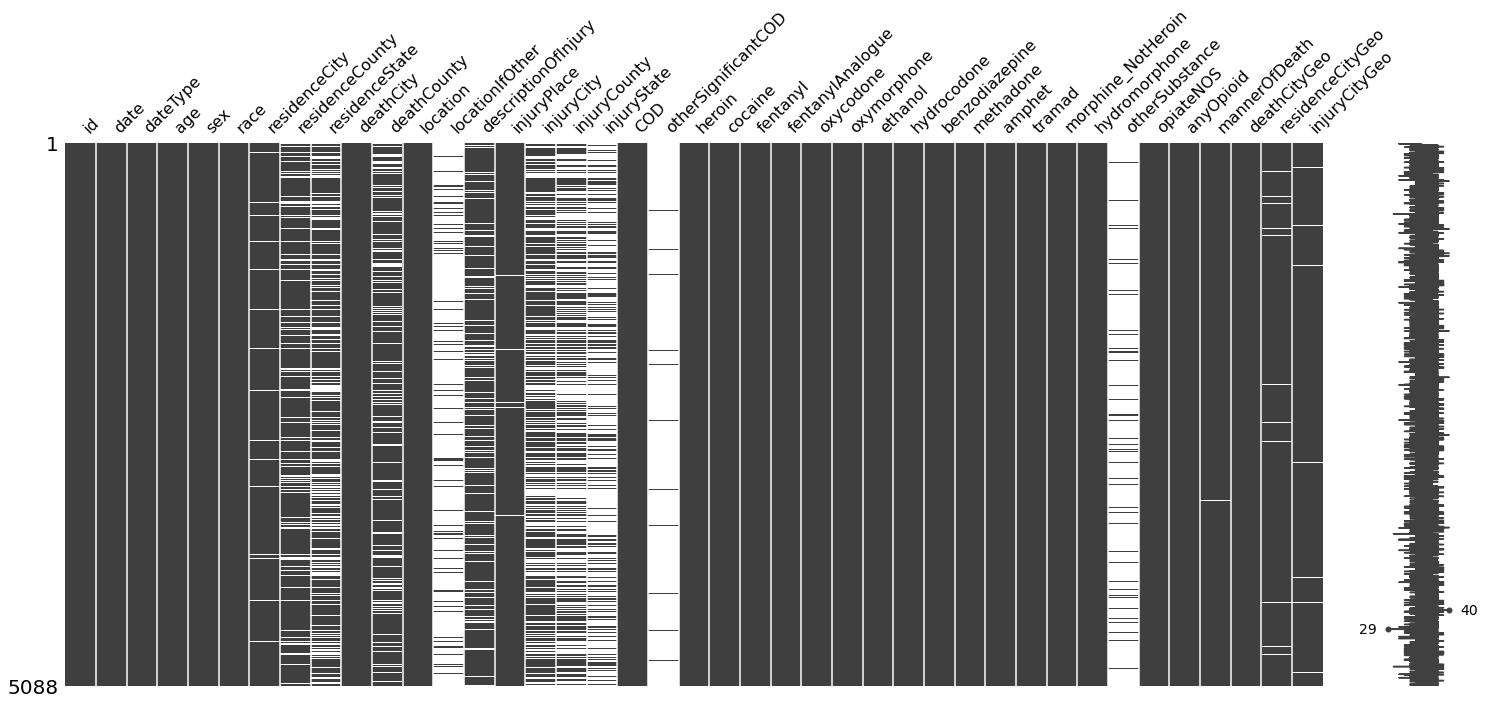

In [ ]:
msno.matrix(accidents)
plt.show()

Ha, more handsome dataset 😎. Great, we are on the way. 🌊 

- Let's see these columns: locationIfOther, otherSignificantCOD and otherSubstance. Why have they so many NA values?

## 👉🏻 *locationIfOther* column

We start with *locationIfOther* column. The diagram shows us that there are a lot of NaN values here, my intention is drop this column after I get all the information from it. (I will transfer its information to location column and then delete it.). But le't have a look on this column. 

In [ ]:
# locationIfOther
inconsistent_rows = accidents['locationIfOther'].isna()
print(accidents.loc[~inconsistent_rows, 'locationIfOther'].value_counts())

Friend's Residence      39
Friend's Home           27
Friend's House          27
In Vehicle              17
Friends House           10
                        ..
boyfriend's house        1
Neighbor's Residence     1
High Ridge Motel         1
In car on road           1
By Railroad Tracks       1
Name: locationIfOther, Length: 321, dtype: int64


We have just 322 values for this column (from ~5000 rows). This strengthen my intuition to do get information from this column and then delete it. From what we can see, we can't complete the NaN values with 'Unknown', there is a strong relationship between location and locationIfOther. Next, we'll study this relationship. :) 

In [ ]:
print(accidents['location'].value_counts())

Residence            2673
Hospital             1620
Other                 770
Convalescent Home       3
Nursing Home            1
Hospice                 1
Name: location, dtype: int64


Logically speaking, if location column has 'Other' value, locationIfOther should not be empty. But we can see that location column has 773 values whereas locationIfOther has just 322 values. Not cool, let's see what's the problem, we'll print all accidents that have location column 'Other' and look to locationIfOther column: 

In [ ]:
accidents_other_locations = accidents.loc[accidents['location'] == 'Other', ['location', 'locationIfOther']]
accidents_other_locations.head(15)

,location,locationIfOther
10,Other,Honey Spot
27,Other,NaN
30,Other,Motel 6
37,Other,NaN
39,Other,Hotel/Motel
47,Other,Park
49,Other,Friend's Home
53,Other,Outside
54,Other,NaN
57,Other,Dunkin donuts


In [ ]:
accidents_other_locations.shape[0]

770

Let's see now how the same thing, vut locationIfOther is not NaN.

In [ ]:
accidents_other_locations = accidents.loc[(accidents['location'] == 'Other') & (~accidents['locationIfOther'].isna()), ['location', 'locationIfOther']] 
accidents_other_locations.shape[0]

558

Just to be sure, are there any accidents that have location column != 'Other' and locationIfOther column has a specific value? 

In [ ]:
accidents_locations = accidents.loc[(accidents['location'] != 'Other') & (~accidents['locationIfOther'].isna()), ['location', 'locationIfOther']] 
accidents_locations

,location,locationIfOther
118,Residence,Basement
138,Residence,Friend's Apartment
630,Residence,back patio
644,NaN,Homeless
814,Residence,Girlfriend's Residence
843,Residence,friend's house
931,Residence,friend's house
1032,Residence,Brother's Home
1392,Residence,Stonington Motel
1424,Residence,mother's house


In [ ]:
accidents_locations.shape[0]

30

Wow, it was a very good idea I checked this. *Never trust a dataset!*
I know I should be serious, there will be people who will see my work, but besides from NaN values for location (which are sadly just 3 cases), the only one case that is somewhat correct is this: 

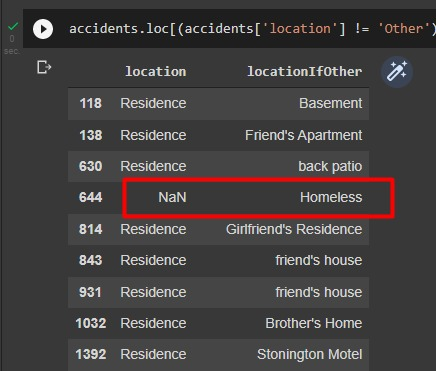



:))) Okay, dark humor. A homeless person doesn't have a home, right? And this makes the specific case correct :))))

Coming back to our serious problems. So we have found that there are 770 cases of 'Other' locations, and from them, we have 560 that are correctly indicated in 'locationIfOther' column.  

- What about the difference of 212 (770 - 558 = 212) cases where we have 'Other' locations, but we have nothing in 'locationIfOther' column? Let's see these locations. (Keep in mind that a few cells above we saw all the "other" locations that have not a NaN value - a number of 560 cases). Are there cases with "Other" locations but NaN locationsifOther?

In [ ]:
accidents_other_locations = accidents.loc[(accidents['location'] == 'Other') & (accidents['locationIfOther'].isna()), ['location', 'locationIfOther']] 
accidents_other_locations.shape[0]

212

Of course there are. We have 212 cases with "Other" locations but NaN locationsIfOther, so we have found the answer to our last questions. 



---



🥳 Having all these in our minds, for "locationIfOther" column we will do as follows:

- For 558 cases we will transfer them to location columns. 
- For 212 cases we will not transfer the column.
- For 30 cases we will solve the problem differently, they are specific cases.


In [ ]:
# For 558 cases we will transfer them to location columns.
accidents.loc[(accidents['location'] == 'Other') & (~accidents['locationIfOther'].isna()), 'location'] = accidents.loc[(accidents['location'] == 'Other') & (~accidents['locationIfOther'].isna()), 'locationIfOther']

In [ ]:
assert accidents.loc[(accidents['location'] == 'Other') & (~accidents['locationIfOther'].isna()), ['location', 'locationIfOther']].shape[0] == 0

In [ ]:
# For 30 cases we will solve the problem differently, they are specific cases.
accidents_locations

,location,locationIfOther
118,Residence,Basement
138,Residence,Friend's Apartment
630,Residence,back patio
644,NaN,Homeless
814,Residence,Girlfriend's Residence
843,Residence,friend's house
931,Residence,friend's house
1032,Residence,Brother's Home
1392,Residence,Stonington Motel
1424,Residence,mother's house


For these 30 cases:
 
 For accidents['locations'] = NaN values and the other cases, we will asumme that locationIfOther is more accurate that location. So we will transfer accidents['locationIfOther'] to accidents['locations']

In [ ]:
accidents.loc[(accidents['location'] != 'Other') & (~accidents['locationIfOther'].isna()), 'location'] = accidents.loc[(accidents['location'] != 'Other') & (~accidents['locationIfOther'].isna()), 'locationIfOther']

In [ ]:
# 558 + these 30 cases solved = 588
assert accidents.loc[(accidents['location'] != 'Other') & (~accidents['locationIfOther'].isna()), ['location', 'locationIfOther']].shape[0] == 588

For the Homeless guy, we will set the location to Unknown:

In [ ]:
accidents[accidents['location'] == 'Homeless'] = 'Unknown'

In [ ]:
assert accidents[accidents['location'] == 'Homeless'].shape[0] == 0

In our study of this dataset, location column has some NaN values. We eliminate some until now, let's see what we have now:

In [ ]:
accidents['location'].isna().sum()

17

We will set them to 'Unknown'.

In [ ]:
accidents.loc[accidents['location'].isna(), 'location'] = 'Unknown'

In [ ]:
# 18 of Unknown locations, 17 + the homeless guy :)
assert accidents[accidents['location']== 'Unknown'].shape[0] == 18

In [ ]:
accidents.loc[(accidents['location'] == 'Other') & (~accidents['locationIfOther'].isna()), ['location', 'locationIfOther']]

,location,locationIfOther


Delete the locationIfOther column:

In [ ]:
accidents.drop('locationIfOther', axis=1, inplace=True)

In [ ]:
accidents.columns

Index(['id', 'date', 'dateType', 'age', 'sex', 'race', 'residenceCity',
       'residenceCounty', 'residenceState', 'deathCity', 'deathCounty',
       'location', 'descriptionOfInjury', 'injuryPlace', 'injuryCity',
       'injuryCounty', 'injuryState', 'COD', 'otherSignificantCOD', 'heroin',
       'cocaine', 'fentanyl', 'fentanylAnalogue', 'oxycodone', 'oxymorphone',
       'ethanol', 'hydrocodone', 'benzodiazepine', 'methadone', 'amphet',
       'tramad', 'morphine_NotHeroin', 'hydromorphone', 'otherSubstance',
       'opiateNOS', 'anyOpioid', 'mannerOfDeath', 'deathCityGeo',
       'residenceCityGeo', 'injuryCityGeo'],
      dtype='object')

In [ ]:
accidents_copy = accidents

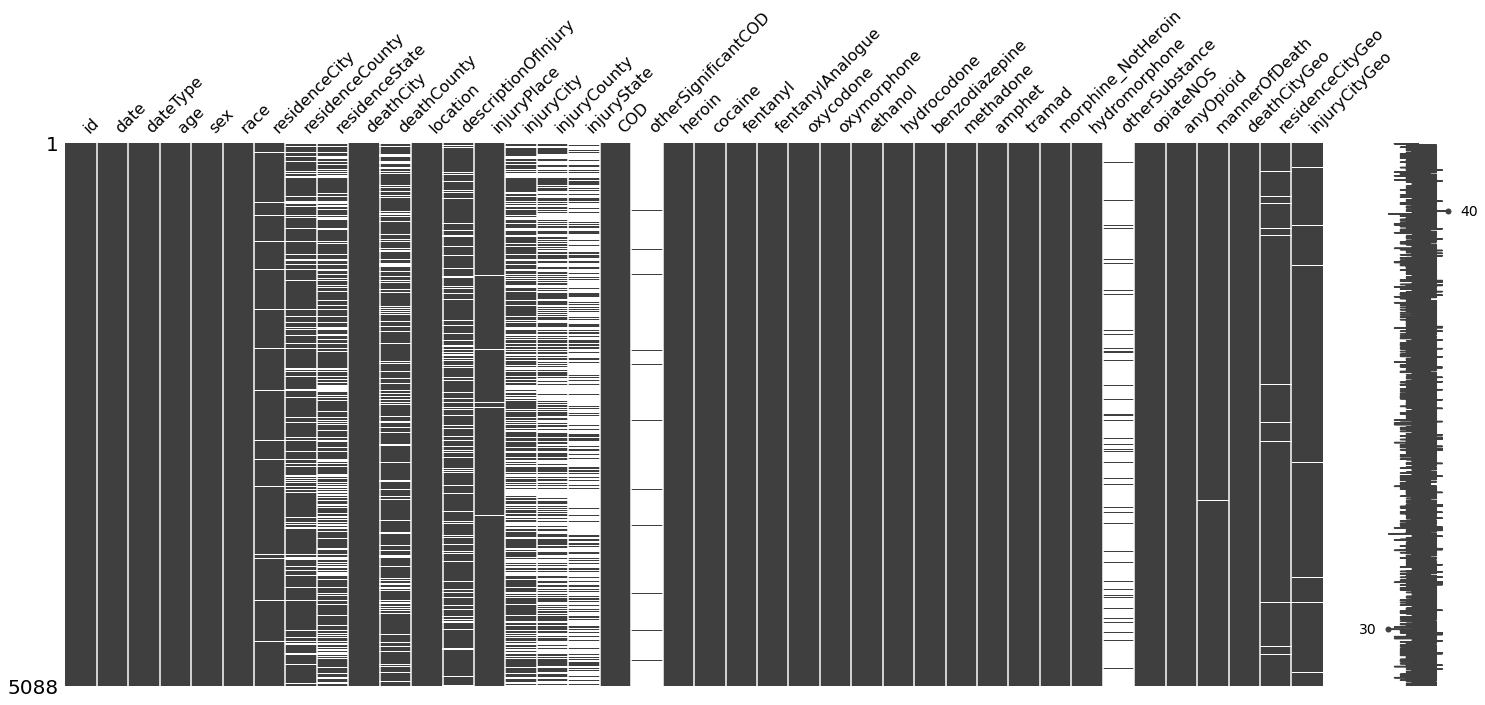

In [ ]:
msno.matrix(accidents_copy)
plt.show()

## 👉🏻 *otherSignificantCOD* column

In [ ]:
accidents.isna().sum()['otherSignificantCOD']

0

In [ ]:
accidents.shape[0]

5088

We have just 169 non NaN values for this column. Great, let's see what these values look like, taking into account "COD" and "otherSignificantCOD" columns are there any duplicates?

In [ ]:
accidents.loc[~accidents['otherSignificantCOD'].isna(), ['COD','otherSignificantCOD']]

,COD,otherSignificantCOD
1,Cocaine Intoxication,No
2,Acute Heroin and Cocaine Intoxication,No
3,Acute Fentanyl and Morphine Intoxication,No
4,Fentanyl Intoxication,No
5,Heroin Intoxication,No
...,...,...
5100,Acute Intoxication due to the Combined Effects...,No
5101,"Multidrug Toxicity Including Heroin, Alprazola...",No
5102,"Multidrug Toxicity Including Heroin, Fentanyl,...",No
5103,Acute Fentanyl intoxication,Cardiac hypertrophy


We have studied the 169 rows and there are no duplicates. These people really had serious problems. :(

What we have to do is simple. In hope this column will help us in our analysis in the future, we will transform the NaN values to 'No' values:

In [ ]:
accidents['otherSignificantCOD'] = accidents['otherSignificantCOD'].fillna('No')

In [ ]:
assert accidents[accidents['otherSignificantCOD'].isna()].shape[0] == 0

In [ ]:
accidents['otherSignificantCOD']

1                        No
2                        No
3                        No
4                        No
5                        No
               ...         
5100                     No
5101                     No
5102                     No
5103    Cardiac hypertrophy
5104                     No
Name: otherSignificantCOD, Length: 5088, dtype: object

## 👉🏻 *otherSubstance* column

In [ ]:
accidents.isna().sum()['otherSubstance']

4655

From 5088 accidents, there are just 5088 - 4655 = 433 accidents with otherSUbstance column not NaN. We can simply fill NaN values with "No".

In [ ]:
accidents['otherSubstance'] = accidents['otherSubstance'].fillna('No')

In [ ]:
assert accidents[accidents['otherSubstance'].isna()].shape[0] == 0

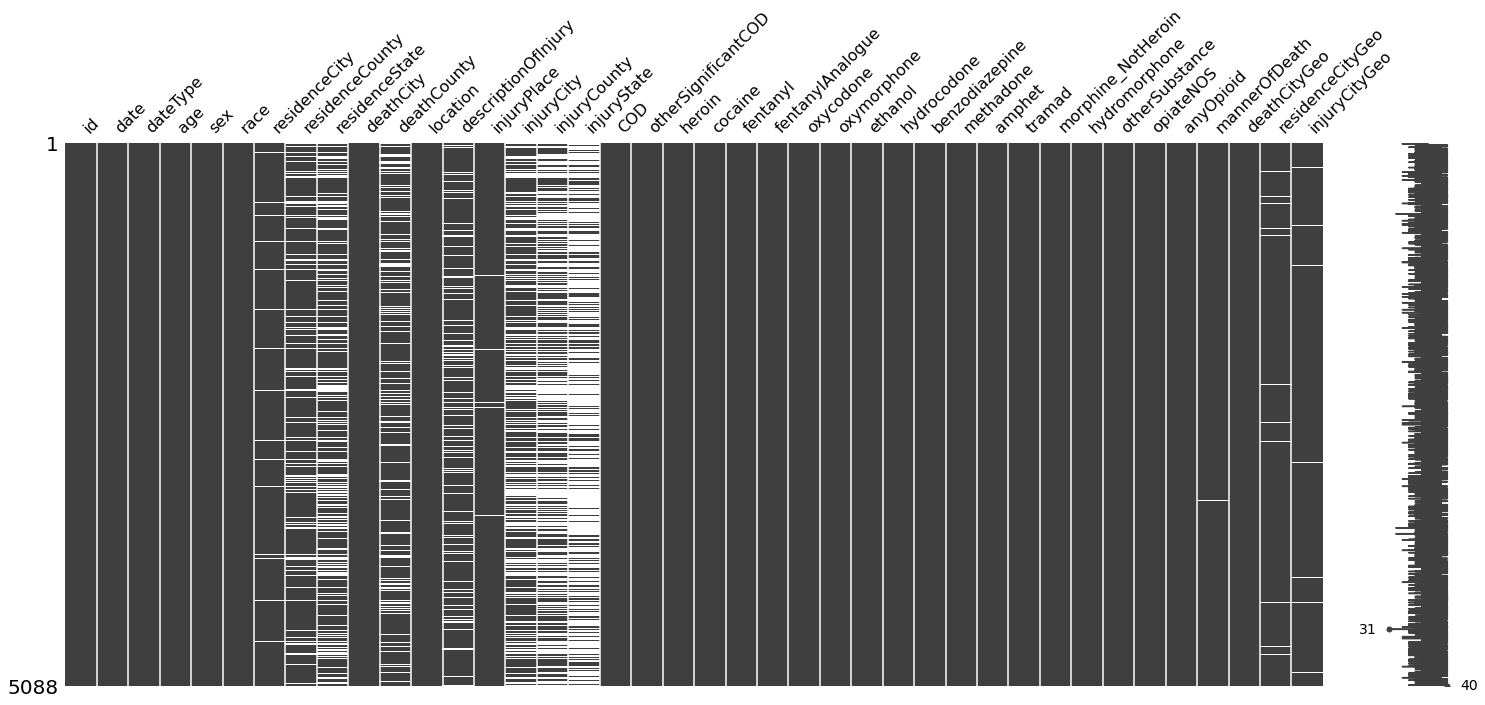

In [ ]:
msno.matrix(accidents_copy)
plt.show()

Perfect, now comes the best part. We see these columns:

- residenceCity, residenceState, residenceCounty and residenceCityGeo

- deathCity and deathCityGeo

- injuryPlace, injuryState, injuryCounty and injuryCityGeo

All these columns have some NaN values. But is there any relationship between them?

What I want to do is this: 
For example, the NaN values in deathCity columns will be completed with deathCityGeo column values (of course, if they exist). And I'll do this for all these columnes I enumerated above.

Let's explore this idea.⛵

In [ ]:
residence_cols = ['residenceCity', 'residenceState', 'residenceCounty', 'residenceCityGeo']
death_cols = ['deathCity', 'deathCityGeo']
injury_cols = ['injuryState', 'injuryCounty', 'injuryPlace', 'injuryCityGeo']

In [ ]:
accidents[residence_cols].head(10)

,residenceCity,residenceState,residenceCounty,residenceCityGeo
1,NORWALK,NaN,NaN,"NORWALK, CT\n(41.11805, -73.412906)"
2,SANDY HOOK,CT,FAIRFIELD,"SANDY HOOK, CT\n(41.419998, -73.282501)"
3,RYE,NY,WESTCHESTER,NaN
4,FLUSHING,NaN,QUEENS,NaN
5,BRISTOL,NaN,NaN,"BRISTOL, CT\n(41.673037, -72.945791)"
6,WEST HARTFORD,NaN,HARTFORD,"WEST HARTFORD, CT\n(41.762008, -72.741807)"
7,HAMDEN,NaN,NEW HAVEN,"HAMDEN, CT\n(41.382918, -72.907743)"
8,EAST HARTFORD,NaN,HARTFORD,"EAST HARTFORD, CT\n(41.769319, -72.643785)"
9,MONTVILLE,NaN,NEW LONDON,"MONTVILLE, CT\n(41.45303, -72.136336)"
10,NaN,NaN,NaN,"CT\n(41.575155, -72.738288)"


In [ ]:
accidents[death_cols].head(10)

,deathCity,deathCityGeo
1,NORWALK,"Norwalk, CT\n(41.11805, -73.412906)"
2,DANBURY,"Danbury, CT\n(41.393666, -73.451539)"
3,GREENWICH,"Greenwich, CT\n(41.026526, -73.628549)"
4,GREENWICH,"Greenwich, CT\n(41.026526, -73.628549)"
5,BRISTOL,"BRISTOL, CT\n(41.673037, -72.945791)"
6,WEST HARTFORD,"WEST HARTFORD, CT\n(41.762008, -72.741807)"
7,NEW HAVEN,"New Haven, CT\n(41.308252, -72.924161)"
8,EAST HARTFORD,"EAST HARTFORD, CT\n(41.769319, -72.643785)"
9,MONTVILLE,"MONTVILLE, CT\n(41.45303, -72.136336)"
10,STRATFORD,"STRATFORD, CT\n(41.200888, -73.131323)"


In [ ]:
accidents[injury_cols].head(10)

,injuryState,injuryCounty,injuryPlace,injuryCityGeo
1,NaN,NaN,NaN,"CT\n(41.575155, -72.738288)"
2,NaN,NaN,Unknown,NaN
3,NaN,NaN,Residence,NaN
4,NaN,NaN,Other,"CT\n(41.575155, -72.738288)"
5,NaN,NaN,Residence,"CT\n(41.575155, -72.738288)"
6,NaN,NaN,Residence,"CT\n(41.575155, -72.738288)"
7,NaN,NaN,NaN,"CT\n(41.575155, -72.738288)"
8,NaN,NaN,Residence,"CT\n(41.575155, -72.738288)"
9,NaN,NaN,Residence,"CT\n(41.575155, -72.738288)"
10,NaN,NaN,Hotel or Motel,"CT\n(41.575155, -72.738288)"


In [ ]:
# death_cols = ['deathCity', 'deathCityGeo']

print('deathCity NaN values:', accidents[death_cols[0]].isna().sum())
print('deathCityGeo NaN values:', accidents[death_cols[1]].isna().sum())
print('-----')
print(accidents.loc[accidents[death_cols[0]].isna(), death_cols])
print('-----')
print(accidents.loc[accidents[death_cols[1]].isna(), death_cols])

deathCity NaN values: 1
deathCityGeo NaN values: 0
-----
     deathCity                 deathCityGeo
1108       NaN  CT\n(41.575155, -72.738288)
-----
Empty DataFrame
Columns: [deathCity, deathCityGeo]
Index: []


We have found:

- residenceState and residenceCounty columns have nothing in common with residenceCityGeo column;
- there is just one case of deathCity NaN value, but we can't use deathCityGeo column to fill it;
- injuryState, injuryCountry, injuryPlace columns have nothing in common with injuryCityGeo column.


So, the idea of using a column to complete another one works just for residenceCity and residenceCityGeo columns.  

What I want to do is to create from residenceCityGeo, deathCityGeo and injuryCityGeo columns two separtate columns: city, latitude and longitude.



```
residenceCityGeo                           city         lat           long
SANDY HOOK, CT(41.575155, -72.738288) -> SANDY HOOK  41.575155    -72.738288    
```

I want to keep the city because later I want to perform a cross field validation with residenceCity column and this new city column. 



To do this, we'll define two functions:
- get_lat_lng(str) -> this function returns a tuple with latitude and longitude coordinates;

- get_city_and_coordinates(str) -> this function returns a tuple with the city, the latitude and the longitude for a city.

The regular expressions for city and coordinates are:

In [ ]:
city_pattern = '^(.+?),'
coord_pattern = '\(([^\)]+)\)'

In [ ]:
def get_lat_lng(coords):
    '''returns coordinates for deathCityGeo, residenceCityGeo, injuryCityGeo columns '''
    try:
        lat, lng = map(float, coords.strip('()').split(','))
    except AttributeError:
        lat = 0
        lng = 0
    return (lat, lng)

In [ ]:
def get_city_and_coordinates(cityString):
  '''return city & coordinates for deathCityGeo, residenceCityGeo, injuryCityGeo columns '''
  try:
      city = re.search(city_pattern, str(cityString)).group(0)
      city = city.strip(',')
      coord = re.search(coord_pattern, str(cityString)).group(0)
  except AttributeError:
      city = "Unknown"
      coord = "(0 , 0)"
  lat, lng = get_lat_lng(coord)
  return (city, lat, lng)

We will transform residenceCItyGeo, injuryCityGeo and deathCItyGeo columns in tuples. One tuple will have 3 elements: (city, lat, lng):

In [ ]:
geo_cols = ['residenceCityGeo', 'injuryCityGeo', 'deathCityGeo']

In [ ]:
for col in geo_cols:
  accidents[col] = accidents.apply(lambda row: get_city_and_coordinates(row[col]), axis=1)

In [ ]:
accidents[geo_cols].head()

,residenceCityGeo,injuryCityGeo,deathCityGeo
1,"(NORWALK, 41.11805, -73.412906)","(Unknown, 0.0, 0.0)","(Norwalk, 41.11805, -73.412906)"
2,"(SANDY HOOK, 41.419998, -73.282501)","(Unknown, 0.0, 0.0)","(Danbury, 41.393666, -73.451539)"
3,"(Unknown, 0.0, 0.0)","(Unknown, 0.0, 0.0)","(Greenwich, 41.026526, -73.628549)"
4,"(Unknown, 0.0, 0.0)","(Unknown, 0.0, 0.0)","(Greenwich, 41.026526, -73.628549)"
5,"(BRISTOL, 41.673037, -72.945791)","(Unknown, 0.0, 0.0)","(BRISTOL, 41.673037, -72.945791)"


In [ ]:
new_cols = ['residenceCityReported', 'residence_lat', 'residence_lng', 
            'injuryCityReported', 'injury_lat', 'injury_lng',
            'deathCityReported', 'death_lat', 'death_lng']

In [ ]:
i = 0
for col in geo_cols:
  accidents[new_cols[i]] = accidents[col].apply(lambda t: t[0])
  accidents[new_cols[i+1]] = accidents[col].apply(lambda t: t[1])
  accidents[new_cols[i+2]] = accidents[col].apply(lambda t: t[2])
  i += 3

In [ ]:
accidents[new_cols].head()

,residenceCityReported,residence_lat,residence_lng,injuryCityReported,injury_lat,injury_lng,deathCityReported,death_lat,death_lng
1,NORWALK,41.118050,-73.412906,Unknown,0.0,0.0,Norwalk,41.118050,-73.412906
2,SANDY HOOK,41.419998,-73.282501,Unknown,0.0,0.0,Danbury,41.393666,-73.451539
3,Unknown,0.000000,0.000000,Unknown,0.0,0.0,Greenwich,41.026526,-73.628549
4,Unknown,0.000000,0.000000,Unknown,0.0,0.0,Greenwich,41.026526,-73.628549
5,BRISTOL,41.673037,-72.945791,Unknown,0.0,0.0,BRISTOL,41.673037,-72.945791


Great, it worked.

What we have to do now is to:
- see if we can complete missing values in residenceCIty column with residenceCityReported.
- we now can get rid of geo columns.
- we'll try to complete another columns like residenceCounty, residenceState, deathCounty, injuryCity, injuryCounty and injuryState columns.

1. Complete missing values in residenceCIty column with residenceCityReported.

How many values are missing in residenceCity column?

In [ ]:
number_of_NaN_residenceCity = accidents['residenceCity'].isna().sum()
number_of_NaN_residenceCity

167

Get all rows with residenceCity NaN and residenceCityReported not a "Missing City":

In [ ]:
accidents.loc[(accidents['residenceCity'].isna()) & (accidents['residenceCityReported'] != 'Missing City'), ['residenceCity', 'residenceCityReported']]

,residenceCity,residenceCityReported
10,NaN,Unknown
11,NaN,Unknown
96,NaN,Unknown
101,NaN,Unknown
107,NaN,Unknown
...,...,...
4872,NaN,Unknown
4879,NaN,Unknown
5017,NaN,Unknown
5023,NaN,Unknown


There are no residenceCityReported values with which we can replace residenceCity column. :(

Now let's explore the other city columns, injuryCity and deathCity column.

How many accidents have residenceCity column NaN and the injuryCityReported column not a missing value?

In [ ]:
accidents.loc[(accidents['residenceCity'].isna()) & (accidents['injuryCityReported'] != 'Missing City'), ['residenceCity', 'injuryCityReported']]

,residenceCity,injuryCityReported
10,NaN,Unknown
11,NaN,Unknown
96,NaN,DANBURY
101,NaN,BRIDGEPORT
107,NaN,Unknown
...,...,...
4872,NaN,Unknown
4879,NaN,SUFFIELD
5017,NaN,Unknown
5023,NaN,Unknown


How many accidents hace residenceCity column Nan and the deathCityReported column not a missing value?

In [ ]:
accidents.loc[(accidents['residenceCity'].isna()) & (accidents['deathCityReported'] != 'Missing City'), ['residenceCity', 'deathCityReported']]

,residenceCity,deathCityReported
10,NaN,STRATFORD
11,NaN,New Haven
96,NaN,Danbury
101,NaN,Bridgeport
107,NaN,Waterbury
...,...,...
4872,NaN,DANBURY
4879,NaN,SUFFIELD
5017,NaN,MERIDEN
5023,NaN,NEW LONDON


How many accidents have residenceCity column NaN and in the same time the injuryCityReported column and deathCityReported column have the same cities?

In [ ]:
accidents_with_city = accidents.loc[(accidents['residenceCity'].isna()) & (accidents['deathCityReported'].str.upper() == accidents['injuryCityReported'].str.upper()) & (accidents['injuryCityReported'] != 'Missing City'), ['residenceCity', 'injuryCityReported', 'deathCityReported']]
accidents_with_city

,residenceCity,injuryCityReported,deathCityReported
96,NaN,DANBURY,Danbury
101,NaN,BRIDGEPORT,Bridgeport
151,NaN,BURLINGTON,BURLINGTON
235,NaN,HARTFORD,Hartford
244,NaN,EAST HARTFORD,East Hartford
...,...,...,...
4802,NaN,BRIDGEPORT,BRIDGEPORT
4803,NaN,BROOKFIELD,Brookfield
4843,NaN,NEW HAVEN,NEW HAVEN
4862,NaN,BRIDGEPORT,Bridgeport


So, what we have found:

The bad news:

- 167 values are missing for residenceCity column;
- from these 167 accidents, we don't have any value in residenceCityReported.

The good news:

- From 167 accidents, we have 167 values for deathCityReported.
- From 167 accidents, we have 112 values for injuryCityReported.
- From 167 accidents, we have 108 cases that present the same non NaN values for deathCityReported and injuryCityReported. 



What will we do next?

We will asumme that the person lived in the same city he died or he harmed himself.

- 1. We will complete the residenceCity column with 108 values (those values that are the same for deathCityReported and injuryCityReported columns). 
- 2. For the rest of 59 cases we will take the same decision (167-108 = 59 cases), we will see that it is not neceessary to divide the cases in 108 cases and 59 cases, but I'll do it anyway because it's a good practice to check things, they could be different.  

In [ ]:
accidents_test = accidents.copy()

In [ ]:
accidents.loc[list(accidents_with_city.index), 'residenceCity'] = accidents_with_city['deathCityReported']

In [ ]:
assert accidents['residenceCity'].isna().sum() == number_of_NaN_residenceCity - accidents_with_city.shape[0]

Now, let's see what to do with these 59 values. We remember that the deathCityReported had values for all NaN values found in residenceCity column.

In [ ]:
accidents_with_city = accidents.loc[accidents['residenceCity'].isna(), ['residenceCity', 'deathCityReported']]
accidents_with_city

,residenceCity,deathCityReported
10,NaN,STRATFORD
11,NaN,New Haven
107,NaN,Waterbury
294,NaN,STAMFORD
312,NaN,WILLIMANTIC
350,NaN,MIDDLETOWN
513,NaN,NEW HAVEN
565,NaN,Hartford
571,NaN,WATERBURY
668,NaN,Stafford Springs


In [ ]:
accidents.loc[list(accidents_with_city.index), 'residenceCity'] = accidents_with_city['deathCityReported']

In [ ]:
assert accidents['residenceCity'].isna().sum() == 0

Delete the 1 case with missing value for death city:

In [ ]:
accidents.dropna(subset=['deathCity'], inplace=True)

In [ ]:
assert accidents['deathCity'].isna().sum() == 0

In [ ]:
cols = ['residenceCounty', 'residenceState', 'deathCounty', 'injuryCity', 'injuryCounty', 'injuryState']

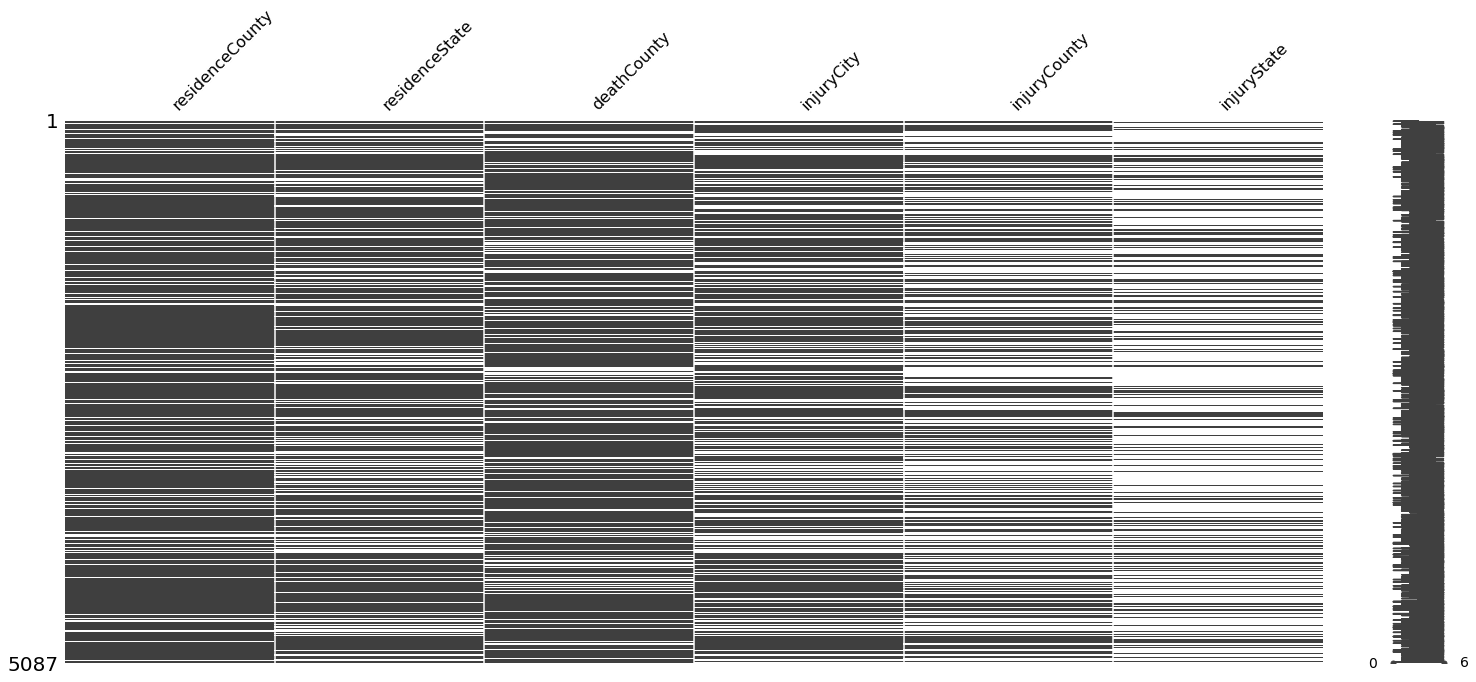

In [ ]:
msno.matrix(accidents[cols])
plt.show()

## 👉🏻 *residenceCounty, deathCounty and injuryCounty* columns

In [ ]:
county_cols = ['residenceCounty', 'deathCounty', 'injuryCounty']

In [ ]:
count_na_res = accidents[county_cols[0]].isna().sum()
count_na_death = accidents[county_cols[1]].isna().sum()
count_na_inj = accidents[county_cols[2]].isna().sum()

In [ ]:
print('Number of missing values for: ')
print(county_cols[0] + ': ' + str(count_na_res))
print(county_cols[1] + ': ' + str(count_na_death))
print(county_cols[2] + ': ' + str(count_na_inj))

Number of missing values for: 
residenceCounty: 789
deathCounty: 1090
injuryCounty: 2731


In [ ]:
accidents[county_cols]

,residenceCounty,deathCounty,injuryCounty
1,NaN,FAIRFIELD,NaN
2,FAIRFIELD,NaN,NaN
3,WESTCHESTER,NaN,NaN
4,QUEENS,FAIRFIELD,NaN
5,NaN,HARTFORD,NaN
...,...,...,...
5100,NEW HAVEN,NEW HAVEN,NaN
5101,NEW HAVEN,NEW HAVEN,NaN
5102,TIOGA,FAIRFIELD,FAIRFIELD
5103,NaN,NaN,NaN


How many accidents have missing for all of these three columns?

In [ ]:
number_na_county = accidents[(accidents[county_cols[0]].isna()) & (accidents[county_cols[1]].isna()) & (accidents[county_cols[2]].isna())].shape[0]
number_na_county

185

For all these three columns, we see that they have the same formats for values.
We will replace all the null values of one column with the not null values of the other columns, and in the end, we will obtain a total of 185 accidents that have missing values for all of the three columns. We will replace these values with 'Unknown' value:

1. deathCounty and residenceCounty:

In [ ]:
count = accidents.loc[(accidents['deathCounty'].isna()) & (~accidents['residenceCounty'].isna()), ['deathCounty', 'residenceCounty']].shape[0]
count

891

In [ ]:
condition = accidents['deathCounty'].isna()

In [ ]:
accidents.loc[condition, 'deathCounty'] = accidents.loc[condition, 'residenceCounty']

In [ ]:
accidents['deathCounty'].isna().sum()

199

In [ ]:
assert accidents['deathCounty'].isna().sum() == count_na_death - count

We have optained 185 missing values for deathCounty column, it is not necesaary to take further steps by replacing deathCounty with injuryCounty.

2. injuryCounty and residenceCounty:

In [ ]:
condition = accidents['injuryCounty'].isna()


In [ ]:
count = accidents.loc[condition, ['injuryCounty', 'residenceCounty']].shape[0]
count

2731

In [ ]:
accidents.loc[condition, 'injuryCounty'] = accidents.loc[condition, 'residenceCounty']

In [ ]:
assert accidents['injuryCounty'].isna().sum() == number_na_county

AssertionError: ignored

3. injuryCounty and deathCounty

In [ ]:
accidents.loc[condition, 'injuryCounty'] = accidents.loc[condition, 'deathCounty']

In [ ]:
assert accidents['injuryCounty'].isna().sum() == number_na_county

4. residenceCounty and deathCounty

In [ ]:
condition = accidents['residenceCounty'].isna()

In [ ]:
accidents.loc[condition, 'residenceCounty'] = accidents.loc[condition, 'deathCounty']

In [ ]:
assert accidents['residenceCounty'].isna().sum() == number_na_county

For those 185 cases, the values for these three columns will be 'Unknown':

In [ ]:
accidents['residenceCounty'] = accidents['residenceCounty'].fillna('Unknown')
accidents['deathCounty'] = accidents['deathCounty'].fillna('Unknown')
accidents['injuryCounty'] = accidents['injuryCounty'].fillna('Unknown')

In [ ]:
assert accidents['residenceCounty'].isna().sum() == 0
assert accidents['deathCounty'].isna().sum() == 0
assert accidents['injuryCounty'].isna().sum() == 0

In [ ]:
msno.matrix(accidents)
plt.show()

## 👉🏻 residenceState and injuryState:

In [ ]:
state_cols = ['residenceState', 'injuryState']

In [ ]:
msno.matrix(accidents[state_cols])
plt.show()

In [ ]:
accidents['residenceState'].isna().sum()

In [ ]:
accidents['injuryState'].isna().sum()

In [ ]:
accidents[state_cols]

In [ ]:
number_na_values = accidents[accidents['injuryState'].isna() & accidents['residenceState'].isna()].shape[0]
number_na_values

In order to minimize the number of missing values for these columns, we'll assume that residenceState is the same as the injuryState.

In [ ]:
condition = accidents['injuryState'].isna()

In [ ]:
accidents.loc[condition, 'injuryState'] = accidents.loc[condition, 'residenceState']

In [ ]:
assert accidents['injuryState'].isna().sum() == number_na_values

In [ ]:
condition = accidents['residenceState'].isna()

In [ ]:
accidents.loc[condition, 'residenceState'] = accidents.loc[condition, 'injuryState'] 

In [ ]:
assert accidents['residenceState'].isna().sum() == number_na_values

For those 1478 cases, the values for these two columns will be 'Unknown':

In [ ]:
accidents['injuryState'] = accidents['injuryState'].fillna('Unknown')
accidents['residenceState'] = accidents['residenceState'].fillna('Unknown')

In [ ]:
assert accidents['injuryState'].isna().sum() == 0
assert accidents['residenceState'].isna().sum() == 0

In [ ]:
msno.matrix(accidents)
plt.show()

## injuryCity

In [ ]:
accidents[['injuryCity', 'injuryCityReported']]